# XGBoost Performance evaluation
## Step1. Load XGBoost instance

In [5]:
import os

from xgboost import XGBClassifier
os.environ['KMP_DUPLICATE_LIB_OK']='True'
clf = XGBClassifier()

## Step2. Prepare required functions
The following function is required for the evaluation
1. Plot function
2. Cross validation function
3. Rename function for field names to prevent xgboost from crash
4. Function to balance dataset classes

In [23]:
from util import read_csv_file_as_df
    

import re

from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(precision=2)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def evaluate_model(clf, X, y):
    score = cross_val_score(clf, X, y, cv=5).mean()
    y_pred = cross_val_predict(clf, X, y, cv=5)
    cnf_matrix = confusion_matrix(y, y_pred)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3], normalize=True,
                          title='Confusion matrix with normalization')
    plt.show()
    print("Accuracy: {}".format(score))

def replace_invalid_field_name_characters(field_name):
    invalid_field_pattern = re.compile('[\[\]\<\,]*')
    return invalid_field_pattern.sub('', field_name)


def handle_imbalanced_data(X, y):

    try:
        sampler = SMOTE(random_state=42)
        X_balanced, y_balanced = sampler.fit_sample(X, y)
        print("Use SMOTE to balance classes.")
    except Exception:
        sampler = RandomOverSampler(random_state=0)
        X_balanced, y_balanced = sampler.fit_sample(X, y)
        print("Use RandomOverSampler to balance classes.")
    return X_balanced, y_balanced

## Step3. Load model input file

In [15]:
data_path = "data/model_input.csv"

input_data = read_csv_file_as_df(data_path)
input_data = input_data.rename(columns=replace_invalid_field_name_characters)
input_data

,NLP,CV,Tool,experience/0/company/104 corporation,experience/0/company/104 manpower bank,experience/0/company/12traits,experience/0/company/3j tech,experience/0/company/500 startups,experience/0/company/500net technology,experience/0/company/academia sinica,...,position/world,position/writer,position/xiaomi,position/y,position/yale,position/years,position/you,position/youce,position/yushan,position/zuvio
0,2,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512,2,1,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
513,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step4. split labels

In [16]:
cv_y = input_data['CV']
nlp_y = input_data['NLP']
tool_y = input_data['Tool']
X = input_data.drop('CV', 1).drop('Tool', 1).drop('NLP', 1)

,experience/0/company/104 corporation,experience/0/company/104 manpower bank,experience/0/company/12traits,experience/0/company/3j tech,experience/0/company/500 startups,experience/0/company/500net technology,experience/0/company/academia sinica,experience/0/company/academia sinica contract,experience/0/company/academia sinica taiwan,experience/0/company/acer,...,position/world,position/writer,position/xiaomi,position/y,position/yale,position/years,position/you,position/youce,position/yushan,position/zuvio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
512,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step5. Balance data set classes and perform evaluation

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

### Evaluate CV model

In [24]:
print(sorted(Counter(cv_y).items()))
X_balanced, cv_y_balanced = handle_imbalanced_data(X, cv_y)
print(sorted(Counter(cv_y_balanced).items()))

[(0, 315), (1, 121), (2, 63), (3, 17)]
Use SMOTE to balance classes.
[(0, 315), (1, 315), (2, 315), (3, 315)]


Normalized confusion matrix
[[0.62 0.22 0.12 0.04]
 [0.21 0.62 0.11 0.06]
 [0.09 0.1  0.79 0.03]
 [0.02 0.01 0.01 0.96]]


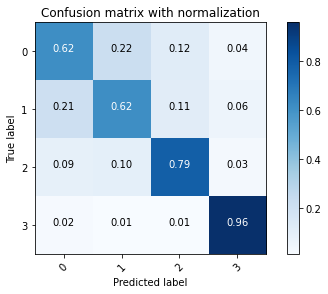

Accuracy: 0.7444444444444442


In [19]:
evaluate_model(clf, X_balanced, cv_y_balanced)

### Evaluate NLP model

In [25]:
print(sorted(Counter(nlp_y).items()))
X_balanced, nlp_y_balanced = handle_imbalanced_data(X, nlp_y)
print(sorted(Counter(nlp_y_balanced).items()))

[(0, 332), (1, 127), (2, 53), (3, 4)]
Use RandomOverSampler to balance classes.
[(0, 332), (1, 332), (2, 332), (3, 332)]


Normalized confusion matrix
[[0.71 0.24 0.05 0.  ]
 [0.04 0.95 0.01 0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]]


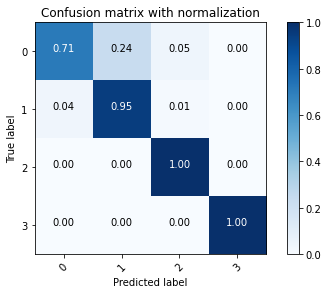

Accuracy: 0.9149694992197475


In [20]:
evaluate_model(clf, X_balanced, nlp_y_balanced)

### Evaluate Tool model

In [26]:
print(sorted(Counter(tool_y).items()))
X_balanced, tool_y_balanced = handle_imbalanced_data(X, tool_y)
print(sorted(Counter(tool_y_balanced).items()))

[(0, 31), (1, 271), (2, 187), (3, 27)]
Use SMOTE to balance classes.
[(0, 271), (1, 271), (2, 271), (3, 271)]


Normalized confusion matrix
[[0.93 0.04 0.01 0.02]
 [0.09 0.49 0.35 0.06]
 [0.08 0.31 0.56 0.05]
 [0.03 0.04 0.03 0.9 ]]


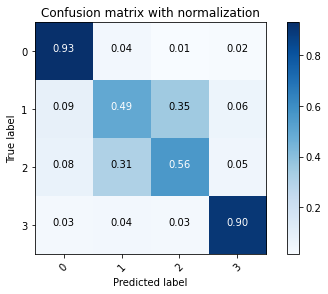

Accuracy: 0.7223630312339989


In [21]:
evaluate_model(clf, X_balanced, tool_y_balanced)